 Approach based on Convolutional Neural Networks for image classification. To this end, we will use the Keras library, which provides a set of functions that facilitate various operations such as data preparation, the definition of the neural network architecture, training, and performance analysis.

As a first example of classification, we will tackle the problem of recognizing handwritten digits from 0 to 9 using the MNIST dataset. This dataset consists of a total of 70,000 grayscale images, each with a resolution of 28 × 28 pixels.

In [ ]:
#caricamento e preparazione dei dati
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#carica i dati MINST
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

id = 300
img = x_test[id,:,:]
y = y_test[id]

plt.figure()
plt.imshow(img, clim=[0,255], cmap='gray')
plt.title(y)
plt.show()

x_valid = x_train[::12]
y_valid = y_train[::12]
x_train = np.delete(x_train,np.arange(0,60000,12),0) #sul primo asse scorro le immagini quindi sulla dim 0
y_train = np.delete(y_train,np.arange(0,60000,12),0) #sul primo asse scorro le immagini quindi sulla dim 0
%whos
img_rows = 28 ; img_cols = 28 ; num_classes = 10

x_test = np.reshape(x_test, (-1, img_rows, img_cols,1))
x_train = np.reshape(x_train, (-1, img_rows, img_cols,1))
x_valid = np.reshape(x_valid, (-1, img_rows, img_cols,1))
x_test = np.float32(x_test) / 255
x_train = np.float32(x_train) / 255
x_valid = np.float32(x_valid) / 255 #float32 va piu veloci delle 64 sulle gpu
#per convertire le etichette da formato sparso a fromato one hot: dopo questa conversione le etichette non saranno piu vettori ma matrici.
#le  colonne sono pari al numero di classi
from tensorflow.keras.utils import to_categorical
y_tets = to_categorical(y_test, num_classes ) #è pari al numeor di classi
y_train = to_categorical(y_train, num_classes )
y_valid = to_categorical(y_valid, num_classes )

y_test[id] #vettore lungo 10 pari al numeoro di classi

#Creiamo rete LENET"""

from tensorflow.keras import layers #ci sono tuttti i livelli prefatti: convoluzionali
lenet = keras.models.Sequential() # crea rete senza livelli completamente vuota
layer1 = layers.Conv2D(6,(5,5), padding='same', activation='relu',input_shape=(img_rows,img_cols,1))#primo parametro: numero di filtri, dimensione del filtro, operazioni opzionali: considera 0 al di fuori dell imagine
#imput shape va indicato solo nel primo livello
#se lavoriamo su audio possiamo mettere conv 1d, dimensione filtro 2x2 parametri opzionali per  bordi , funzione id attivazione
#input con un certo numero di righe colonne e canali

lenet.add(layer1) #aggiungo layer1 a lenet

layer2 = layers.MaxPooling2D((2,2))
lenet.add(layer2)

layer3 = layers.Conv2D(16, (5,5), padding='valid', activation='relu')
lenet.add(layer3)

layer4 = layers.MaxPooling2D((2,2))
lenet.add(layer4)
#bisogna applicare una trasformazione dati, quindi mettiamo un layer fittizio che fa un operazione di fratel:
#prende una matrice e la fa diventare un vettore"""
layer5 =layers.Dense(120, activation='relu') #numero di neuroni in uscita e funzzione di attivazione
lenet.add(layer5)

layer6 = layers.Dense(84, activation='relu')
lenet.add(layer6)

layer7 = layers.Dense(10, activation='softmax')
lenet.add(layer7)
#per avere info sulla rete e i suoi parametri"""
lenet.summary() #tabella riassuntiva
#definiti i dati e la rete ora bisogna definire la funzione di loss e la tecnica di ottimizazzione"""

#addestramento
lenet.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate = 0.01),
              metrics = [keras.metrics.CategoricalAccuracy(),]) #categorical perchè le etichette le abbioamo invertite in formato one hot

11490434/11490434 [==============================] - 0s 0us/step


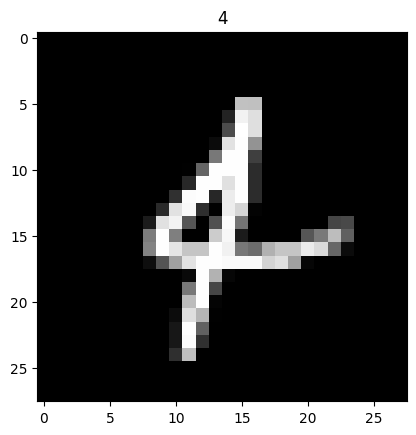

Variable   Type       Data/Info
-------------------------------
id         int        300
img        ndarray    28x28: 784 elems, type `uint8`, 784 bytes
keras      module     <module 'keras.api._v2.ke<...>i/_v2/keras/__init__.py'>
mnist      module     <module 'keras.api._v2.ke<...>asets/mnist/__init__.py'>
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
x_test     ndarray    10000x28x28: 7840000 elems, type `uint8`, 7840000 bytes (7.476806640625 Mb)
x_train    ndarray    55000x28x28: 43120000 elems, type `uint8`, 43120000 bytes (41.1224365234375 Mb)
x_valid    ndarray    5000x28x28: 3920000 elems, type `uint8`, 3920000 bytes (3.7384033203125 Mb)
y          uint8      4
y_test     ndarray    10000: 10000 elems, type `uint8`, 10000 bytes
y_train    ndarray    55000: 55000 elems, type `uint8`, 55000 bytes
y_valid    ndarray    5000: 5000 elems, type `uint8`, 5000 bytes
Model: "seq

In [ ]:
#TESTIAMO LA RETE SU UN'IMMAGINE
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#carica i dati MINST
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

id = 300
img = x_test[id,:,:]
y = y_test[id]

plt.figure()
plt.imshow(img, clim=[0,255], cmap='gray')
plt.title(y)
plt.show()

x_valid = x_train[::12]
y_valid = y_train[::12]
x_train = np.delete(x_train,np.arange(0,60000,12),0) #sul primo asse scorro le immagini quindi sulla dim 0
y_train = np.delete(y_train,np.arange(0,60000,12),0) #sul primo asse scorro le immagini quindi sulla dim 0
%whos
img_rows = 28 ; img_cols = 28 ; num_classes = 10

x_test = np.reshape(x_test, (-1, img_rows, img_cols,1))
x_train = np.reshape(x_train, (-1, img_rows, img_cols,1))
x_valid = np.reshape(x_valid, (-1, img_rows, img_cols,1))
x_test = np.float32(x_test) / 255
x_train = np.float32(x_train) / 255
x_valid = np.float32(x_valid) / 255 #float32 va piu veloci delle 64 sulle gpu
#per convertire le etichette da formato sparso a fromato one hot: dopo questa conversione le etichette non saranno piu vettori ma matrici . le  colonne sono pari al numero di classi e le righe
from tensorflow.keras.utils import to_categorical
y_tets = to_categorical(y_test, num_classes )#è pari al numeor di classi
y_train = to_categorical(y_train, num_classes )
y_valid = to_categorical(y_valid, num_classes )

y_test[id] #vettore lungo 10 pari al numeoro di classi

#Creiamo rete lenet"""
from tensorflow.keras import layers #ci sono tuttti i livelli prefatti: convoluzionali
lenet = keras.models.Sequential() # crea rete senza livelli completamente vuota
layer1 = layers.Conv2D(6,(5,5), padding='same', activation='relu',input_shape=(img_rows,img_cols,1))#primo parametro: numero di filtri, dimensione del filtro, operazioni opzionali: considera 0 al di fuori dell imagine
#imput shape va indicato solo nel primo livello
#se lavoriamo su audio possiamo mettere conv 1d, dimensione filtro 2x2 parametri opzionali per  bordi , funzione id attivazione
#input con un certo numero di righe colonne e canali

lenet.add(layer1) #aggiungo layer1 a lenet

layer2 = layers.MaxPooling2D((2,2))#bocchetto su cui fare il massismo
lenet.add(layer2)

layer3 = layers.Conv2D(16, (5,5), padding='valid', activation='relu')
lenet.add(layer3)

layer4 = layers.MaxPooling2D((2,2))
lenet.add(layer4)
#bisogna applicare una trasformazione dati, quindi mettiamo un layer fittizio che fa un operazione di fratel:
#prende una matrice e la fa diventare un vettore"""
layer5 =layers.Dense(120, activation='relu') #numero di neuroni in uscita e funzzione di attivazione
lenet.add(layer5)

layer6 = layers.Dense(84, activation='relu')
lenet.add(layer6)

layer7 = layers.Dense(10, activation='softmax')
lenet.add(layer7)
#per avere info sulla rete e i suoi parametri"""
lenet.summary() #tabella riassuntiva
#definiti i dati e la rete ora bisogna definire la funzione di loss e la tecnica di ottimizazzione"""
lenet.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate = 0.01),
              metrics = [keras.metrics.CategoricalAccuracy(),]) #categorical perchè le etichette le abbioamo invertite in formato one hot

In [ ]:
#training
lenet.fit(x_train, y_train, batch_size=200, epochs=10, validation_data=(x_valid, y_valid))

#analisi delle prestazioni
lenet.evaluate(x_test, y_test, batch_size=200)

y_pred = lenet.predict(x_test, batch_size=200) #uscita della rete
y_pred = np.argmax(y_pred, 1)  #voglio sapere a che classe assegnare immagine in ingresso e non la probabilità come sopra
y_true = np.argmax(y_test,1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred) #matrice di confusione
#se voglio vedere predizione su una singola immagine"""
id =100
img = x_test[id,:,:,:]
vero = np.argmax(y_test[id])
img= np.reshape(img, (1,28,28,1))
predizione = lenet.predict(img) #predict lavora su piu immagini alla volta percio dobbiamo fare prima il reshape

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img[0,:,:,0], clim=[0,1], cmap='gray')
plt.title(vero)
plt.subplot(1,2,2)
plt.bar(np.arange(0,10), predizione[0,:])
plt.xticks(np.arange(0,10)) # per visualizzare meglio la figura
plt.show()
lenet.predict() #lavora su 4 immagini alla volta
#!nvidia-smi #da potenza e memoria occupata..